In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import pickle

In [3]:
from experiments import BasicSetup
from experiments import utilities as utils
from bayesinverse import Regression

In [29]:
config_path = Path(
    "/home/rmaiwald/code/Experiments/experiments/basic_setup/config.yaml"
)

exp = BasicSetup(config_path)
# basic_setup.run()


sensors 0.0028482377529144287
emissions 1.5380537509918213
transport 4.332953035831451


In [30]:
source_group_path = Path(
    "/mnt/data/users/rmaiwald/GRAMM-GRAL/emissions/pickle_jar/source_groups_infos.csv"
)
source_group_df = pd.read_csv(
    source_group_path,
    index_col=0,
)


In [31]:
path = Path("/mnt/data/users/rmaiwald/")

with open(
    path / "GRAMM-GRAL/emissions/heat_traffic/tno_districts_gdf.pickle",
    "rb",
) as file:
    tno_districts_gdf = pickle.load(file)


In [32]:
abs_emissions = exp.emissions.absolute_emissions

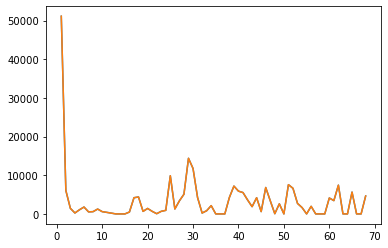

In [33]:
plt.plot(np.arange(len(abs_emissions)) + 1, abs_emissions)
plt.plot(source_group_df["CO2[kg/hour]"])

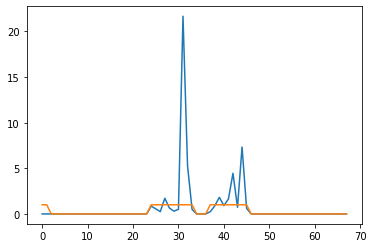

In [34]:
plt.plot(exp.emissions.get_mean_TNO())
plt.plot(exp.emissions.get_TNO())

In [35]:
[(source_group_df["source_type"] == "TNO area").values]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False])]

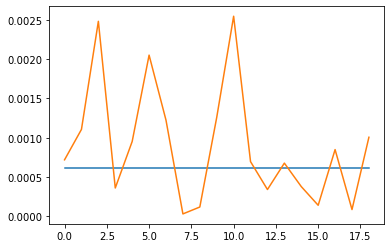

In [36]:
plt.plot(
    (exp.emissions.get_mean_TNO() * exp.emissions.absolute_emissions)[
        (source_group_df["source_type"] == "TNO area").values
    ]
    / tno_districts_gdf["area"]
)
plt.plot(
    (exp.emissions.get_TNO() * exp.emissions.absolute_emissions)[
        (source_group_df["source_type"] == "TNO area").values
    ]
    / tno_districts_gdf["area"]
)


In [37]:
# Sanity check
print((exp.emissions.get_mean_TNO() * exp.emissions.absolute_emissions).sum())
print((exp.emissions.get_TNO() * exp.emissions.absolute_emissions).sum())

<xarray.DataArray ()>
array(93196.74554278)
<xarray.DataArray ()>
array(150418.76026199)


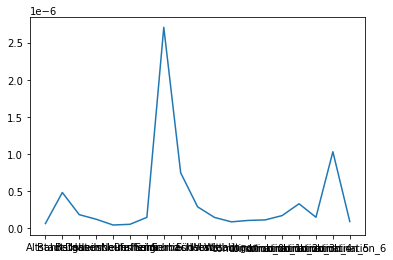

In [38]:
plt.plot(
    exp.emissions.get_mean_TNO()[source_group_df["source_type"] == "TNO area"]
    / tno_districts_gdf["area"] 
)


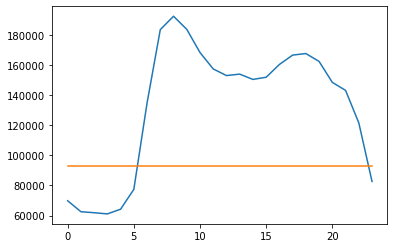

In [39]:
plt.plot(exp.emissions.truth_absolute.sum("source_group"))
plt.plot(exp.emissions.prior_absolute.sum("source_group"))
pass

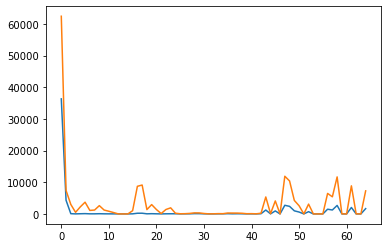

In [40]:
plt.plot(exp.emissions.truth_absolute.min("time_state"))
plt.plot(exp.emissions.truth_absolute.max("time_state"))


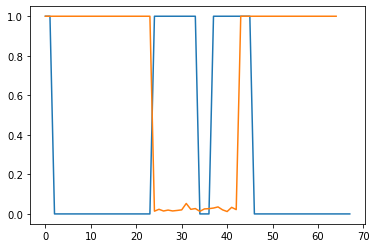

In [45]:
plt.plot(exp.emissions.get_TNO())
plt.plot(exp.emissions.truth.mean("time_state"))


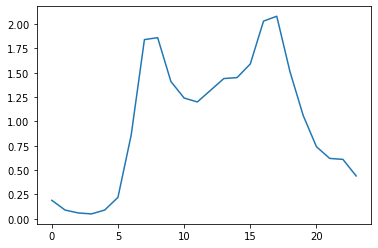

In [41]:
plt.plot(exp.emissions.truth.isel(source_group=10))

In [ ]:
exp.data["test"] = np.arange(10)

In [ ]:
# exp.pickle_data()

In [6]:
exp.load_data()

In [4]:
exp.K = exp.transport.get_transport(
    exp.sensors.n_sensors, exp.sensors.get_index(), exp.emissions
)


KeyboardInterrupt: 

In [ ]:
""" n_sensor_sample = 20
sensor_ids = exp.sensors.get_sample_ids(n_sensor_sample)

exp.reg = Regression(
    y=utils.stack_xr(
        exp.K.isel(sensor=sensor_ids) @ exp.emissions.truth
        + exp.sensors.get_noise(n_sensor_sample)
    ).values,
    K=utils.stack_xr(exp.K.isel(sensor=sensor_ids)).values,
    x_prior=utils.stack_xr(exp.emissions.prior).values,
    x_covariance=utils.stack_xr(exp.emissions.prior_covariance).values*0.1,
    y_covariance=utils.stack_xr(
        exp.sensors.get_covariance().isel(sensor=sensor_ids)
    ).values,
)
x_est, res, rank, s = exp.reg.fit()
posterior = exp.emissions.to_xr(x_est)
 """

' n_sensor_sample = 20\nsensor_ids = exp.sensors.get_sample_ids(n_sensor_sample)\n\nexp.reg = Regression(\n    y=utils.stack_xr(\n        exp.K.isel(sensor=sensor_ids) @ exp.emissions.truth\n        + exp.sensors.get_noise(n_sensor_sample)\n    ).values,\n    K=utils.stack_xr(exp.K.isel(sensor=sensor_ids)).values,\n    x_prior=utils.stack_xr(exp.emissions.prior).values,\n    x_covariance=utils.stack_xr(exp.emissions.prior_covariance).values*0.1,\n    y_covariance=utils.stack_xr(\n        exp.sensors.get_covariance().isel(sensor=sensor_ids)\n    ).values,\n)\nx_est, res, rank, s = exp.reg.fit()\nposterior = exp.emissions.to_xr(x_est)\n '

In [ ]:
exp.reg = Regression(
    y=utils.stack_xr(
        exp.K @ exp.emissions.truth
        + exp.sensors.get_noise()
    ).values,
    K=utils.stack_xr(exp.K).values,
    x_prior=utils.stack_xr(exp.emissions.prior).values,
    x_covariance=utils.stack_xr(exp.emissions.prior_covariance).values,
    y_covariance=utils.stack_xr(
        exp.sensors.get_covariance()
    ).values,
)
x_est, res, rank, s = exp.reg.fit()
posterior = exp.emissions.to_xr(x_est)


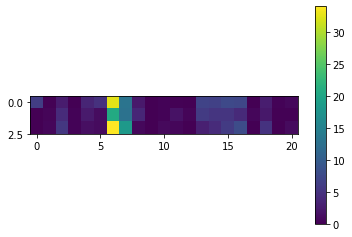

In [ ]:
im = plt.imshow(exp.K.sum(dim="sensor"))
plt.colorbar()

In [ ]:
exp.emissions.mask


<xarray.DataArray (source_group: 59)>
array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])
Coordinates:
  * source_group  (source_group) int64 1 2 3 4 5 6 7 8 ... 53 54 55 56 57 58 59

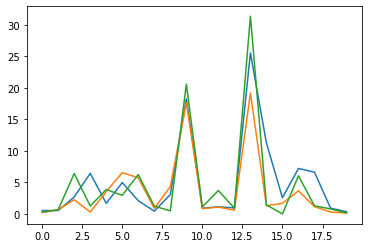

In [ ]:
plt.plot((exp.K @ exp.emissions.truth))

In [ ]:
x_est, res, rank, s = exp.reg.fit()

In [ ]:
posterior = exp.emissions.to_xr(x_est)


In [ ]:
utils.stack_xr(posterior)

<xarray.DataArray (state: 21)>
array([ 0.65882194,  0.59581895,  1.0554943 ,  1.7670879 ,  0.68701535,
        0.6210254 ,  1.02281559,  0.91491819,  1.19668929, 31.16540987,
        2.55553214,  0.40682356,  1.48606978,  1.01695035,  0.99244983,
        0.88813599,  0.98292031,  1.19681196,  1.14619439,  5.29590616,
        0.6975233 ])
Coordinates:
  * state         (state) MultiIndex
  - source_group  (state) int64 1 2 21 22 23 24 25 26 ... 33 34 35 36 37 38 39
  - time_state    (state) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
posterior = posterior * exp.emissions.get_absolute()[exp.emissions.mask]
posterior_covariance = (
    exp.emissions.to_xr(np.diag(exp.reg.get_posterior_covariance()))
    * exp.emissions.get_absolute()[exp.emissions.mask]**2
)


In [ ]:
a = np.array([["a", "b"],["c", "d"]])
b = np.array([[1, 2], [3, 4]])
np.tensordot(b, b, axes=0).reshape(4, 4), np.tensordot(b, b, axes=0).shape

(array([[ 1,  2,  3,  4],
        [ 2,  4,  6,  8],
        [ 3,  6,  9, 12],
        [ 4,  8, 12, 16]]),
 (2, 2, 2, 2))

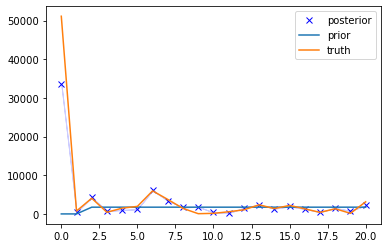

In [ ]:
mean = posterior.mean("time_state")
std = posterior.std("time_state")
line = plt.plot(mean, "bx", label="posterior")[0]
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2, color=line._color)

plt.plot(exp.emissions.prior_absolute.mean("time_state"), label="prior")
plt.plot(exp.emissions.truth_absolute.mean("time_state"), label="truth")
plt.legend()

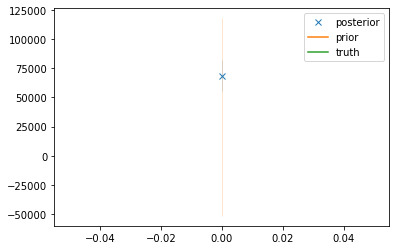

In [ ]:
mean = posterior.sum("source_group")
# std = np.tile(posterior.mean("source_group").std("time_state"), len(mean))
std = np.sqrt((posterior_covariance).sum("source_group"))
line = plt.plot(mean, "x", label="posterior")[0]
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2, color=line._color)

mean = exp.emissions.prior_absolute.sum("source_group")
std = np.sqrt(
    exp.emissions.prior_variance
    * exp.emissions.get_absolute()[exp.emissions.mask] ** 2
).sum("source_group")
line = plt.plot(mean, label="prior")[0]
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2, color=line._color)

plt.plot(exp.emissions.truth_absolute.sum("source_group"), label="truth")
plt.legend()


0.9392771851641731
0.4156784805055098
0.8411155458255388
1.2019297591900346
1.0353867820957041
0.9459619357072531
0.9966356116449577
0.9948094664377324
0.9568163901281711
2.3754020574327868
1.125309450134475
1.5674328326888736
0.09622908512444636
0.9549995091715493
1.014421956939244
0.992628115058451
0.9945536223908064
0.8888676572614314
1.0420431950653855
1.661835895459299
0.20342964770303312


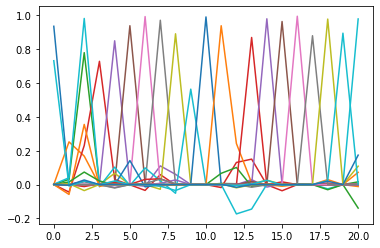

In [ ]:
averaging_kernel = exp.reg.get_averaging_kernel()
for i in range(averaging_kernel.shape[0]):
    kernel = averaging_kernel[i]
    plt.plot(kernel, label=kernel.sum())
    print(kernel.sum())
# plt.legend()


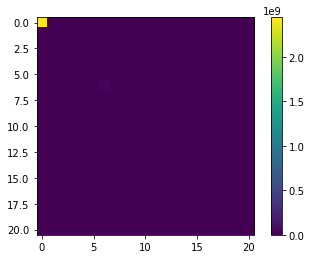

In [ ]:
im = plt.imshow(
    exp.emissions.truth_absolute.values
    * exp.reg.get_averaging_kernel()
    * exp.emissions.truth_absolute.values.T
)
plt.colorbar(im)


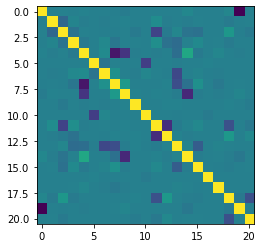

In [ ]:
plt.imshow(exp.reg.get_correlation())

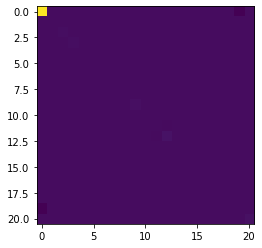

In [ ]:
plt.imshow(
    exp.emissions.truth_absolute.values
    * exp.reg.get_posterior_covariance()
    * exp.emissions.truth_absolute.values.T
)


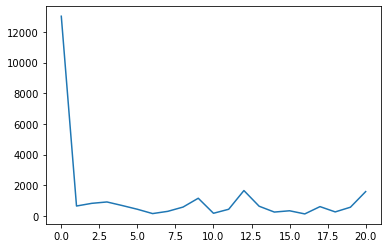

In [ ]:
plt.plot(
    np.sqrt(np.diag(exp.reg.get_posterior_covariance()))
    * exp.emissions.truth_absolute.values[:, 0]
)


In [ ]:
exp.reg.get_information_content(), exp.reg.get_dof_signal(), exp.reg.get_dof_noise()

(28.371533660094514, 16.663266611992587, 4.3367333880074135)